In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('F:/Ineuron_Internship/Project_CCDP/DataSet/CustomerCreditCard.csv')

### Understanding the Data

In [3]:
data.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_1,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(30000, 25)

* Data consist the numerical values.
* There are 25 variable and 30000 record present in the data.
* There are such variables which are numercial in nature but works as Categorical and those variable are: SEX, EDUCATION, MARRIAGE, AGE and PAY1 - PAY6
* DEFAULT_PAYMENT_NEXT_MONTH will be the label column.
* DEFAULT_PAYMENT_NEXT_MONTH have 0 and 1 as their value so, we can say its a binary classification problem.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* There is no missing value is present in this data.
* ID columns has unique value for each record, which means it represents the ID of each customer, we can drop it.
* There are 10 Categorcal columns but numerical in nature.
* There are 12 Numerical Columns present in the data.

## Data Description
- **ID** - This feature consist unique ID of each customer.
- **LIMIT_BAL** - This feature consist balace limit of each customer and `Numerical` in nature which lies between **10000** to **1000000**
- **SEX** - This feature cosist gender of each customer and `Categorical` in nature where **1 means Male** and **2 means Female**
- **EDUCATION** - This feature consist the education level of each customer and `Categorical` in nature where **1 means Graduate**, **2 means University**, **3 means High School** and **4 means Other** 
- **MARRIAGE** - This feature consist the marriage information of customer and `Categorical` in nature where **1 means Married**, **2 means Single** and **3 means Others** 
- **AGE** - This features consist Age of all customer which lies between **21** to **79** and `Numerical` in nature.
- **PAY_1 - PAY_6** - These features consist the history of past 6 months of payment of a customer, which is `Categorical` in nature where  **-1 = pay duly**, **1 = payment delay for one month**, **2 = payment delay for two months**, . . .**8 = payment delay for eight months**, **9 = payment delay for nine months** and above
- **BILL_AMT1 - BILL_AMT6** -  These features consists the amount of bill statement (dollars) for past 6 months and `Numerical` in nature
- **PAY_AMT1 - PAY_AMT6** - These features consists the amount of previous payment for the past 6 months and `Numerical` in nature
- **DEFAULT_PAYMENT_NEXT_MONTH** - This is Label where **1 means Yes** `Customer going to be defaulter in their payment` and **0 means No** `Cusomter is not going to make any default in their payment`.



* When we look at the mean and std of numerical columns so, we can find there is a skewness in this data.

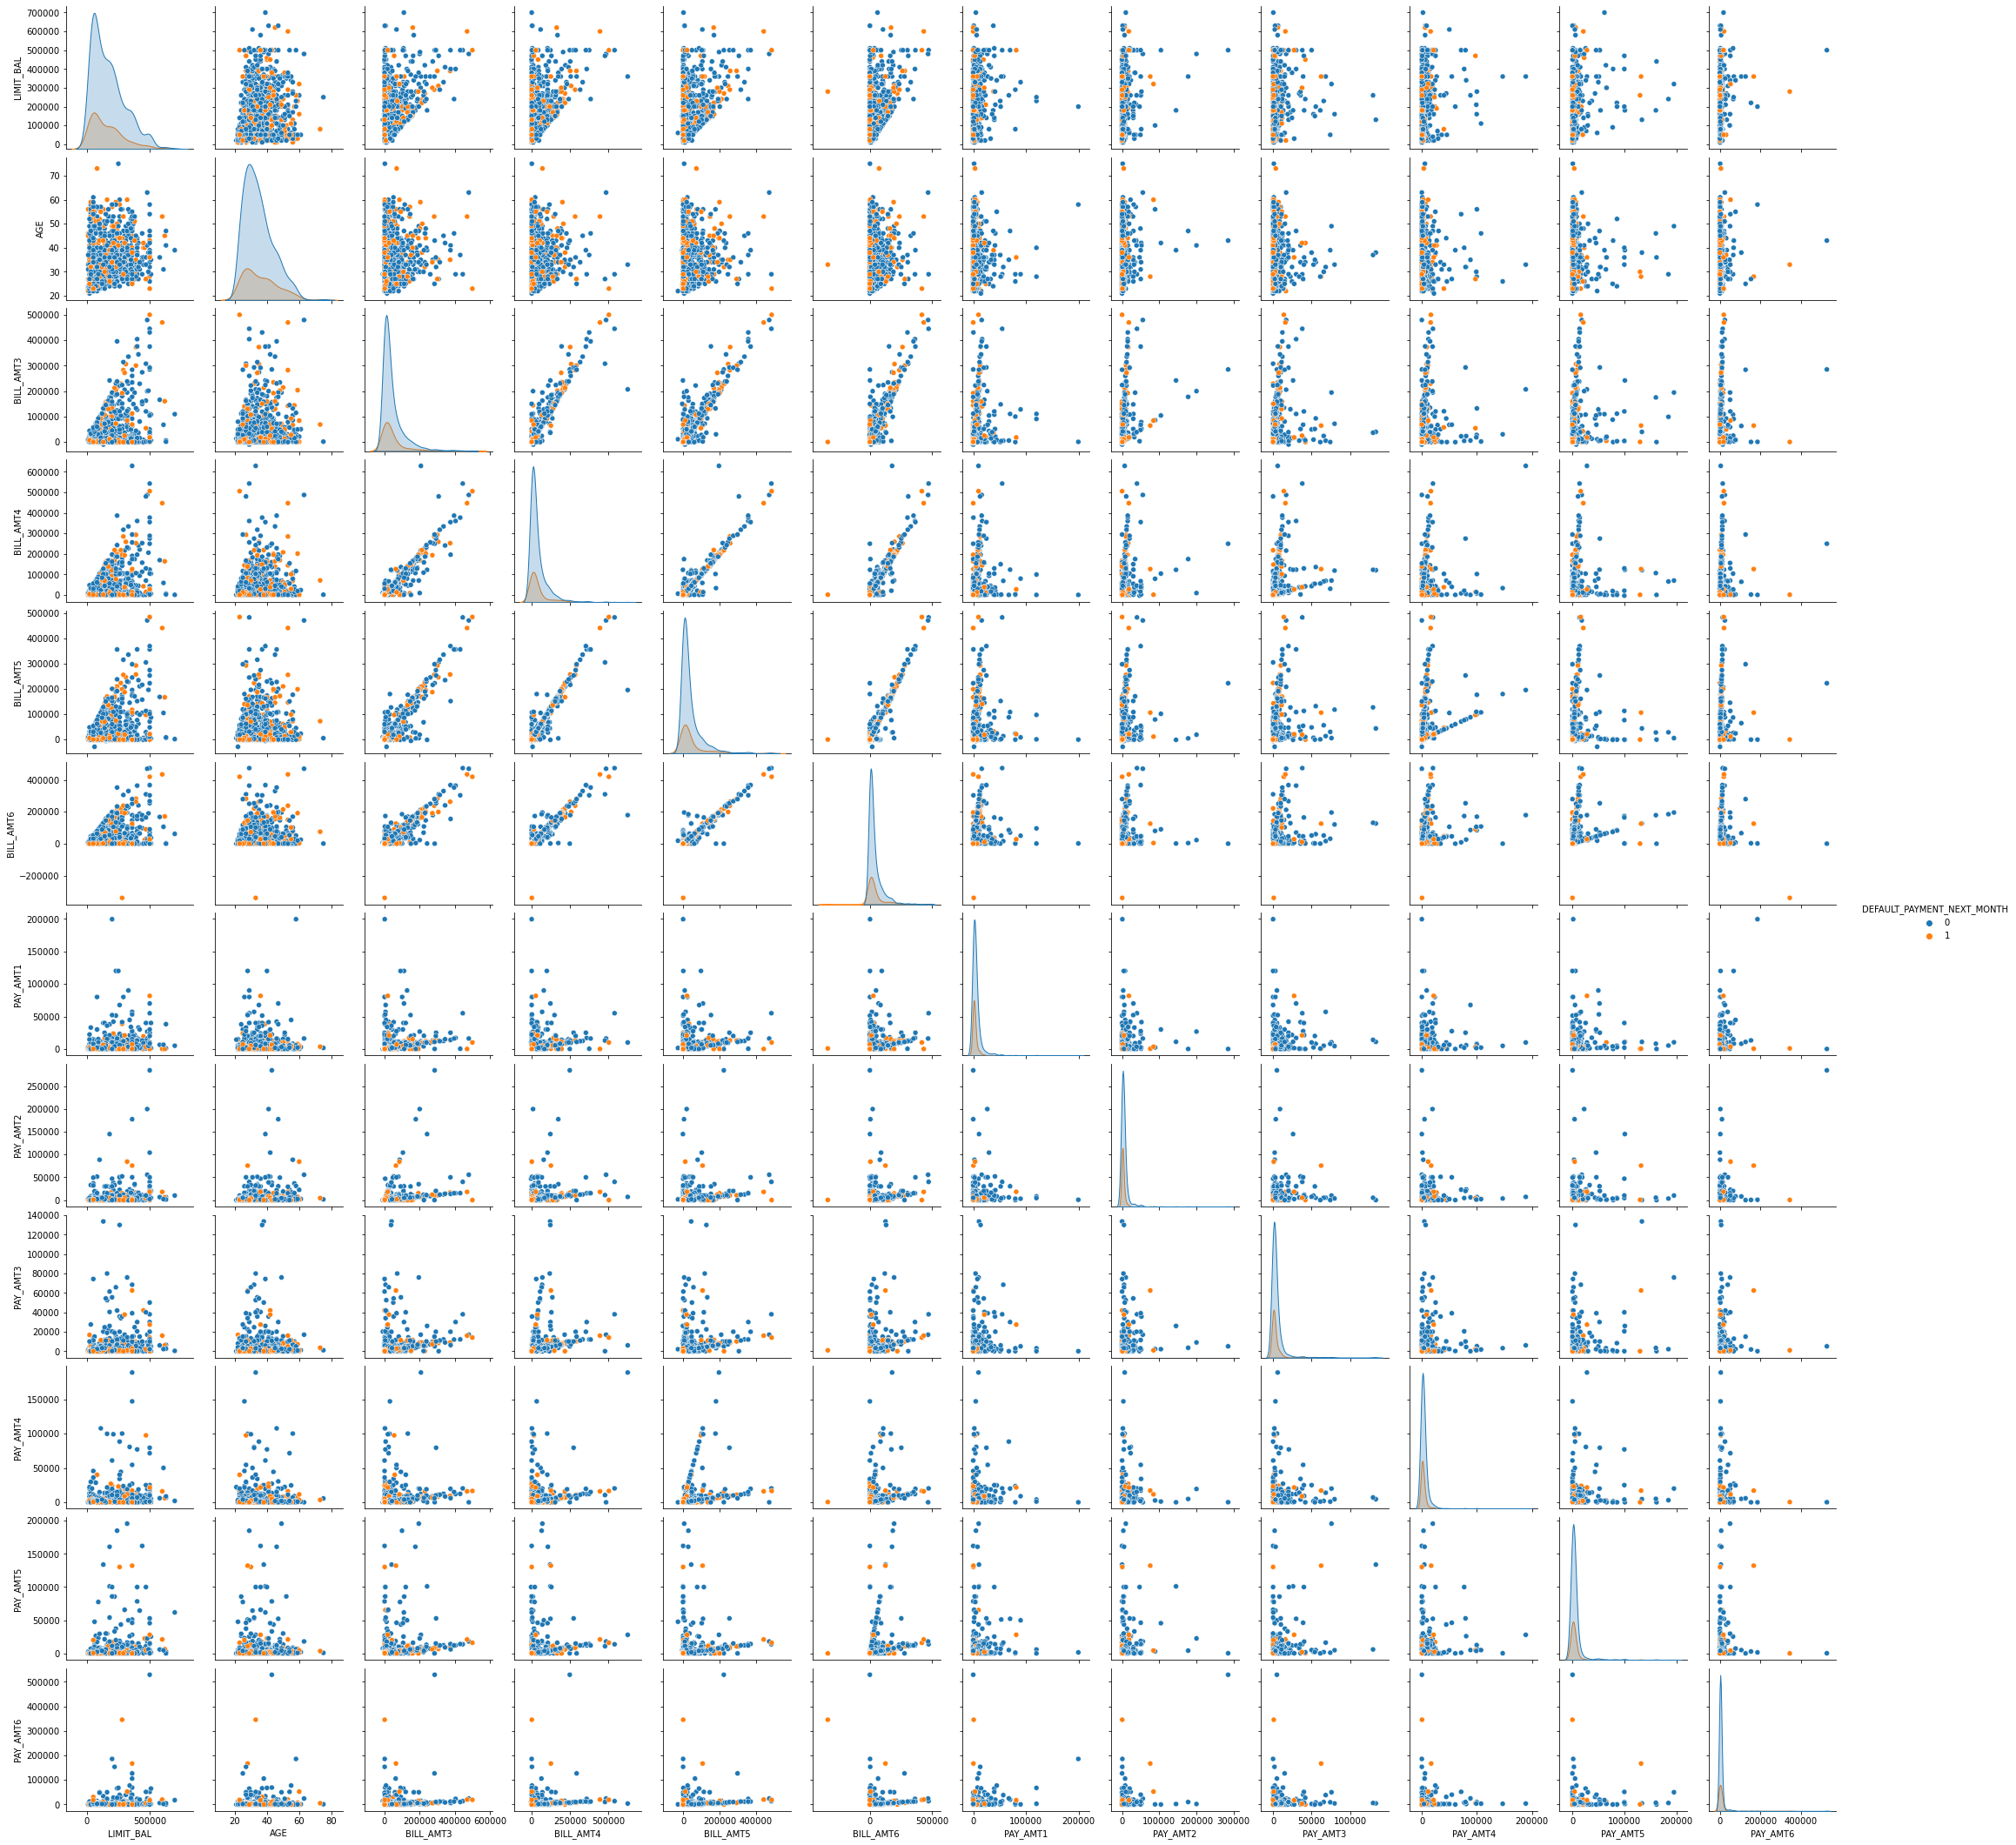

In [7]:
# pair plot for genreal understanding of label data regarding to the feature data
# There is some memory problem so I select 1000 records on numerical columns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

data1 = data[['LIMIT_BAL', 'AGE', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"DEFAULT_PAYMENT_NEXT_MONTH" ]]
sns.pairplot(data1.iloc[:1000,:], hue="DEFAULT_PAYMENT_NEXT_MONTH")

* After seeing the distribution of DEFAULT_PAYMENT_NEXT_MONTH on the feature columns. We can conclude like its a binary classification problem and in this case we can use Logistic Regression as a base line mode but for accurate or good prediction have to try KNN, Random Forest and XGBoost for this use case.

* Baseline model - LogisticRegression
* BestModel - KNN, RandomForest and XgBoost

# Univariante Analysis

In [8]:
# Check the values distribution of lable
label_value_percentage = (data['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts()/data['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts().sum())* 100
print(label_value_percentage)

0    77.88
1    22.12
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: float64


* 0 having the 77% of this data where as 1 only having 22% which indicates that this is a imbalenced data set.
* If we use this data as it is so, it will cause the baisness towards the 0 in prediction.
* For this usecase we use UpSampling because we have 30,000 records as total and if we use DownSampling/UnderSampling so we end up with less data records, which is not good for model building.

In [9]:
data.drop(columns=['ID'], inplace=True)

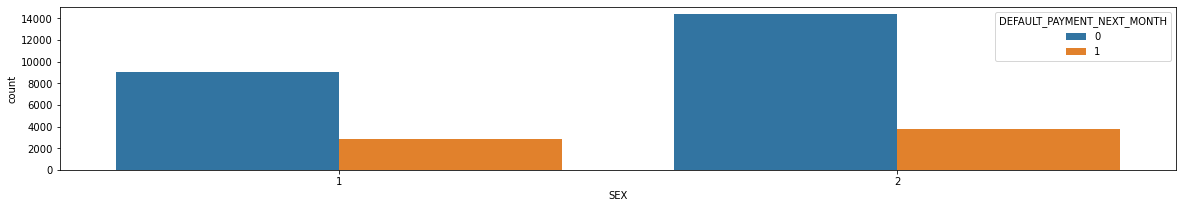

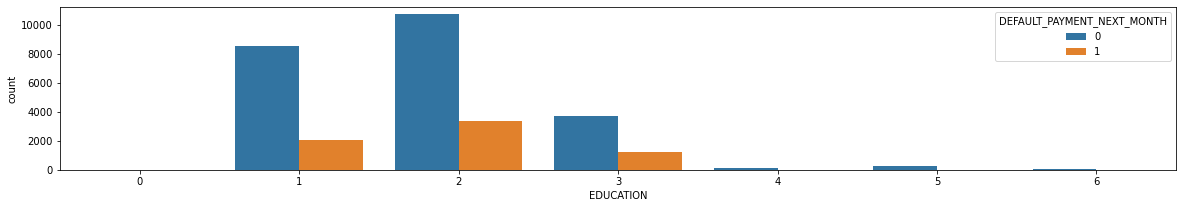

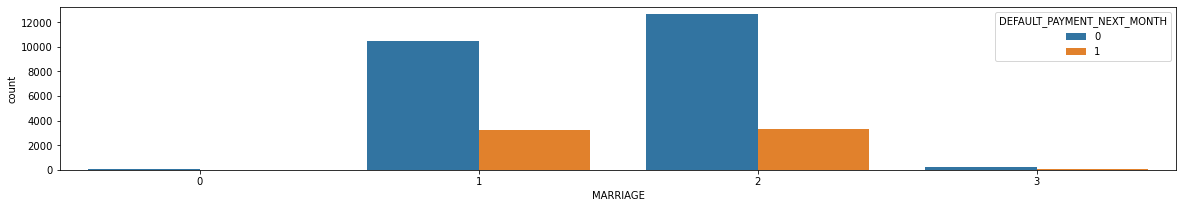

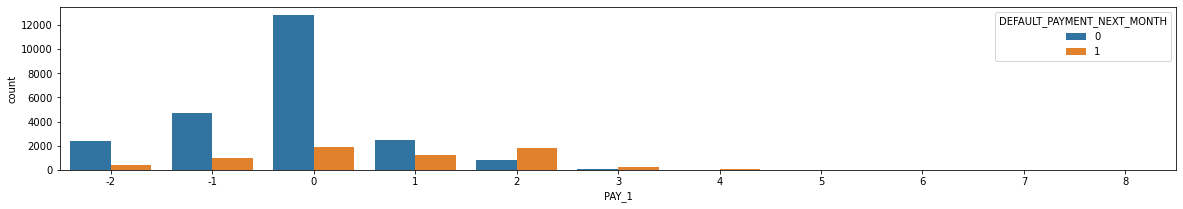

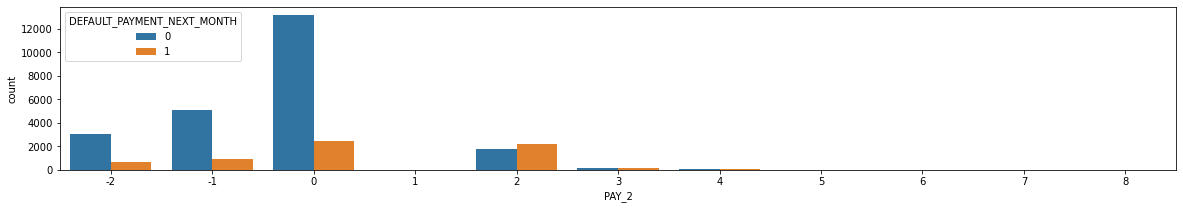

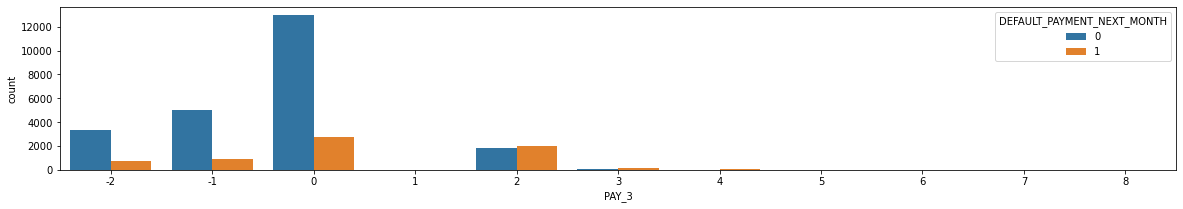

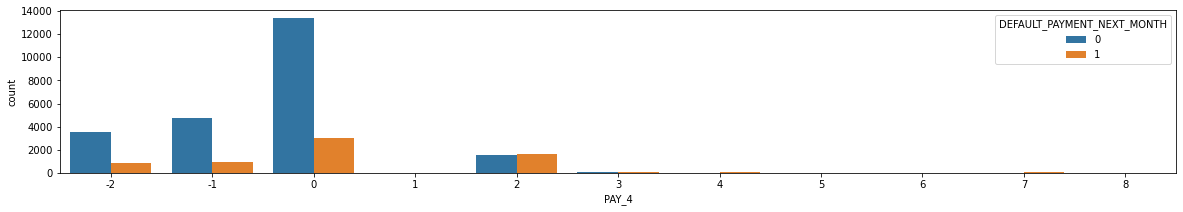

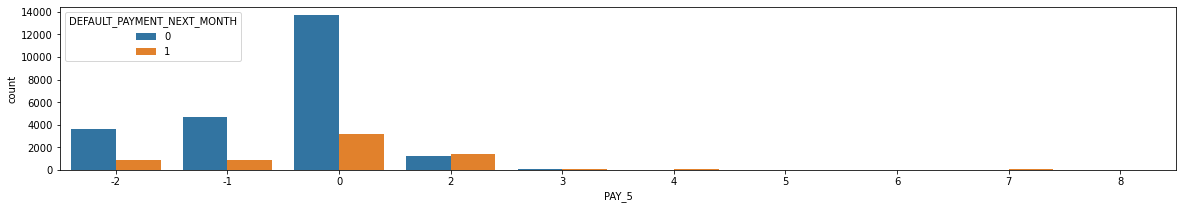

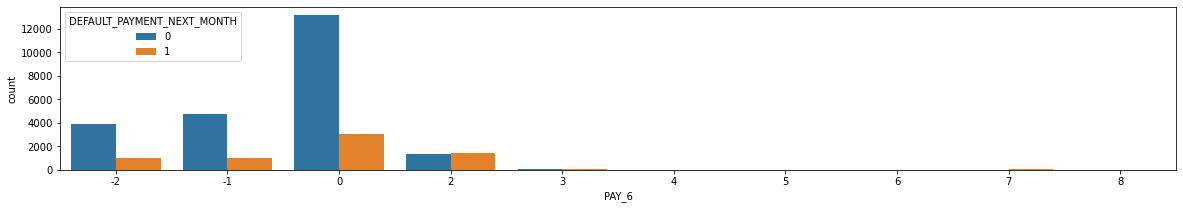

In [10]:
for i, predictor in enumerate(data.drop(columns=['DEFAULT_PAYMENT_NEXT_MONTH', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                                          'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                                          'PAY_AMT6'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='DEFAULT_PAYMENT_NEXT_MONTH')

* Ratio of female is grater than male, Where female holds the count of 14000 and on the other hand male consist around 9000. 
* The defaulter ratio of male and female are not much higher as compare to its non-defaulters, not even a half of it.
* In Education we can see most of the customers are lies between 1-3, where there is very few customers are lies on 4,5,6 category.
* If we compare defaulter ratio between 1,2,3 so 2 having high defaulters, if we consider all the points so, in this also the deafulters ration is low then its non-defaulters ratio. `1 means Graduate, 2 means University, 3 means High School and 4,5,6 means Other`
* In Marriage columns there are lot of customer which lies between Married=1 and Single=2, and defaulter ration of both are same
* In pay1-pay6 There are lot of cutomers they having no dues=0 on their payment.
* If a customer is dealy their payment for 2 month or more than 2 month so that customer will be in a list of defaulters.

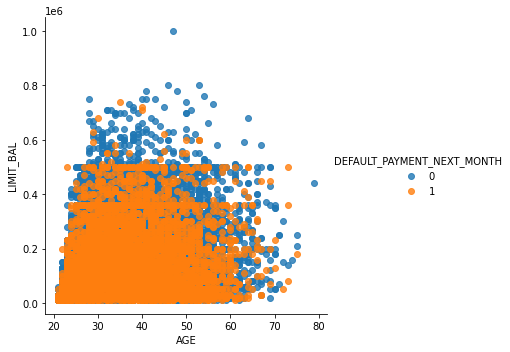

In [11]:
# Relationship between Limit Balance and Age with respect to defualters
sns.lmplot(data=data, x='AGE', y='LIMIT_BAL', hue='DEFAULT_PAYMENT_NEXT_MONTH', fit_reg=False)

* The defaulters customer are not based on their age or balance limit

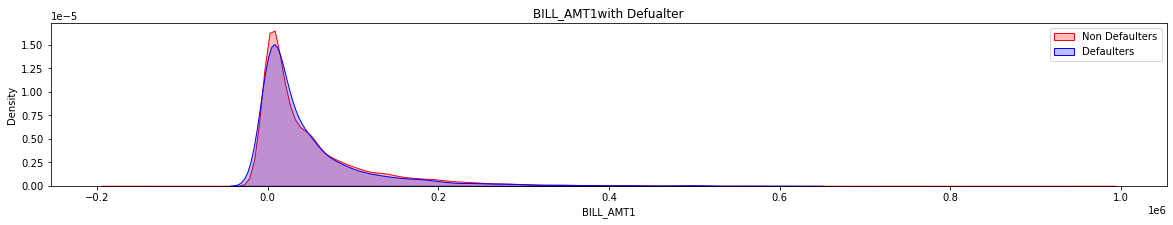

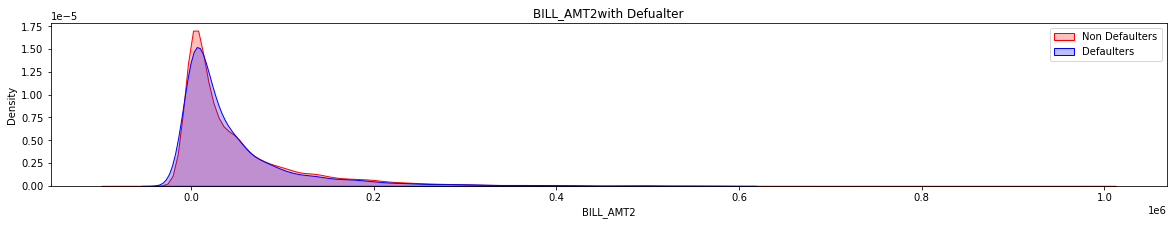

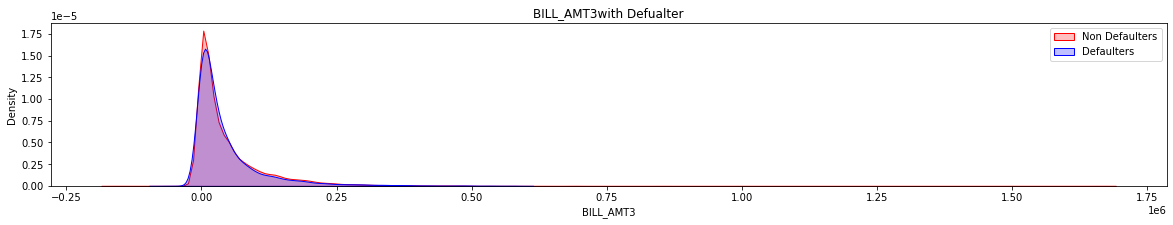

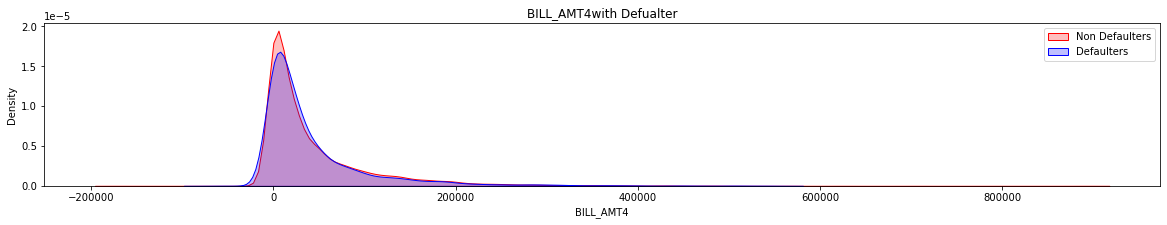

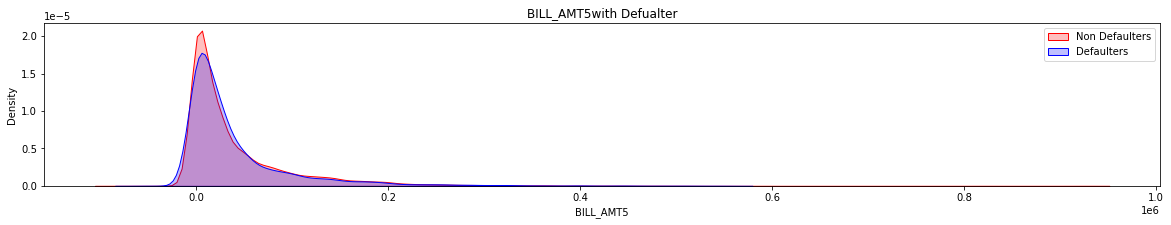

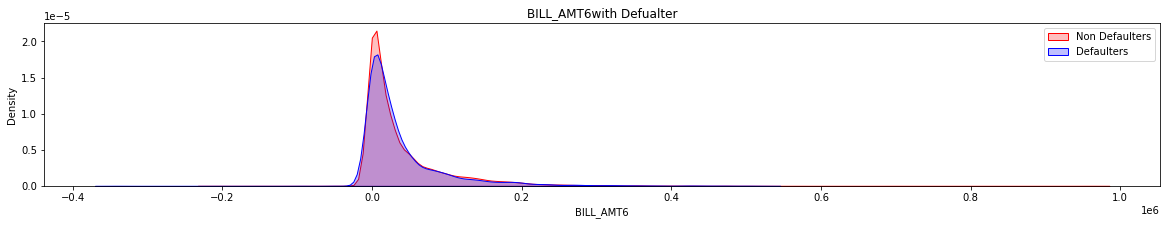

<Figure size 1440x216 with 0 Axes>

In [12]:
billamt= ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i in billamt:
    Mth = sns.kdeplot(data[i][(data["DEFAULT_PAYMENT_NEXT_MONTH"] == 0) ],
                color="Red", shade = True)
    Mth = sns.kdeplot(data[i][(data["DEFAULT_PAYMENT_NEXT_MONTH"] == 1) ],
                ax =Mth, color="Blue", shade= True)
    Mth.legend(["Non Defaulters","Defaulters"],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(i)
    Mth.set_title(i+ 'with Defualter')
    plt.figure(i)

* Most of the data points are lies between the same range, so we can merge all these columns and make a one 'TOTAL_BILL_AMT' column.


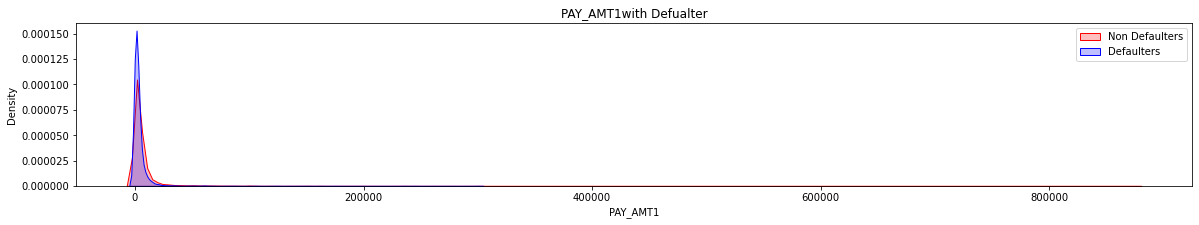

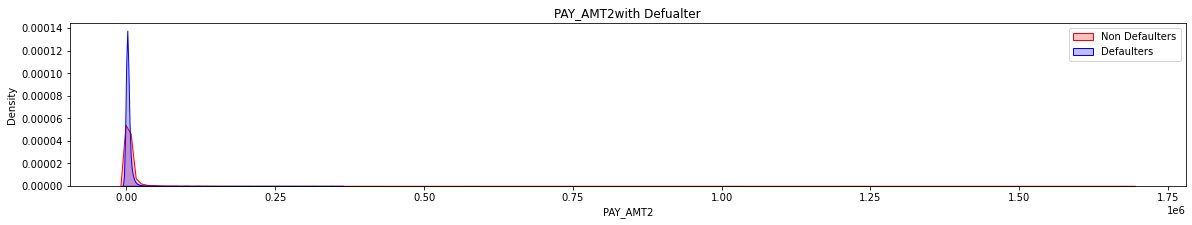

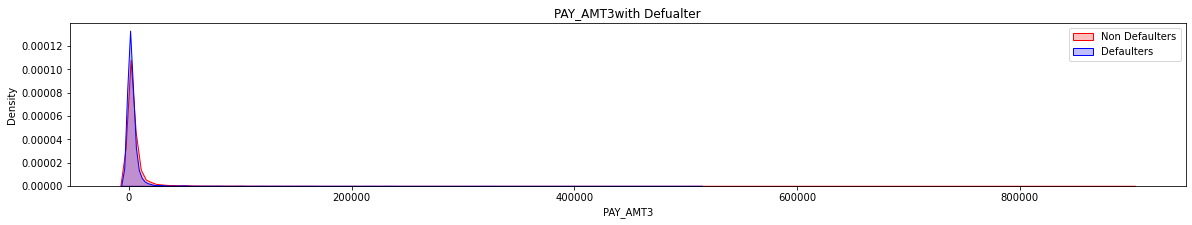

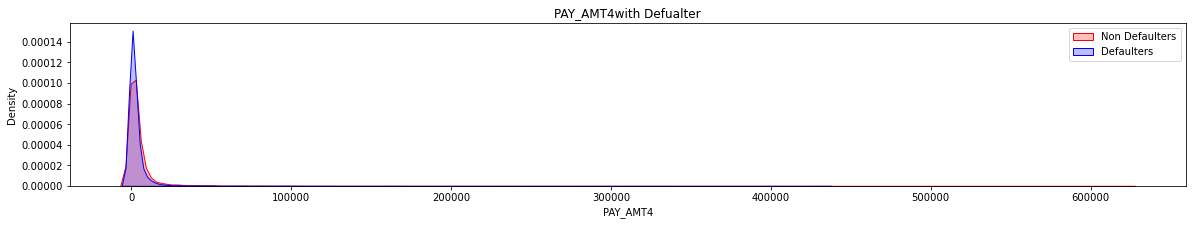

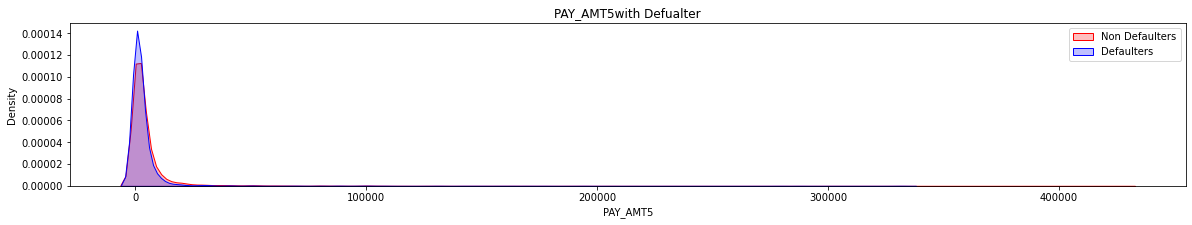

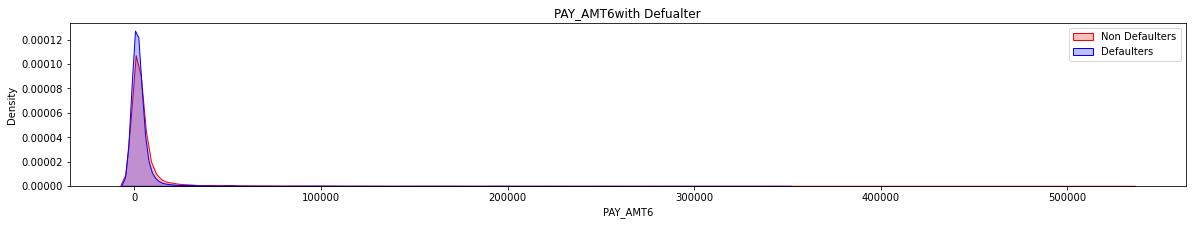

<Figure size 1440x216 with 0 Axes>

In [13]:
payamt= ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in payamt:
    Mth = sns.kdeplot(data[i][(data["DEFAULT_PAYMENT_NEXT_MONTH"] == 0) ],
                color="Red", shade = True)
    Mth = sns.kdeplot(data[i][(data["DEFAULT_PAYMENT_NEXT_MONTH"] == 1) ],
                ax =Mth, color="Blue", shade= True)
    Mth.legend(["Non Defaulters","Defaulters"],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(i)
    Mth.set_title(i + 'with Defualter')
    plt.figure(i)

* This also lies in the same range and we can also make a 'TOTAL_PAY_AMT' cloumn

## Validate and Preprocess the data.

In [14]:
# checking if there is 0 standard deviation present in the data or not.
def std_zero(dataframe):
    numericalfetures = [i for i in dataframe.columns if dataframe[i].dtypes == 'int64' or dataframe[i].dtypes == 'float64']
    for feature in numericalfetures:
        if dataframe[feature].std()== 0:
            dataframe.drop(columns=feature,axis=1,inplace=True)
    return dataframe

In [15]:
std_zero(data)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [16]:
# removing all the duplicates column from the dataset
def remove_duplicates(dataframe):
    dataframe.drop_duplicates(keep='first', inplace=True)
    return dataframe

In [17]:
data = remove_duplicates(data)

In [18]:
def make_new_columns(dataframe):
    dataframe['TOTAL_BILL_AMT'] = dataframe['BILL_AMT1']+ dataframe['BILL_AMT2'] + dataframe['BILL_AMT3'] + dataframe['BILL_AMT4'] + dataframe['BILL_AMT5'] + dataframe['BILL_AMT6']
    dataframe['TOTAL_PAY_AMT'] = dataframe['PAY_AMT1'] + dataframe['PAY_AMT2'] + dataframe['PAY_AMT3'] + dataframe['PAY_AMT4'] + dataframe['PAY_AMT5'] + dataframe['PAY_AMT6']
    
    dataframe.drop(columns=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=True)
    
    return dataframe
    

In [19]:
data = make_new_columns(data)

## Featrue Selection

In [20]:
# For feature selection I will use Feature Importance Technique which is very usefule in Classification usecases

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
X = data.drop(columns=['DEFAULT_PAYMENT_NEXT_MONTH'])
y = data['DEFAULT_PAYMENT_NEXT_MONTH']
model.fit(X,y)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.1304219  0.01294421 0.04777343 0.02710258 0.14688255 0.10862439
 0.05532355 0.03787721 0.03619782 0.03834906 0.03581199 0.16320263
 0.15948867]


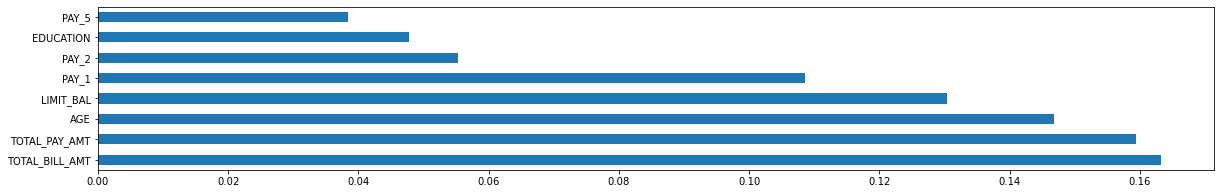

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

* These are the Top 8 Feature we use for our model training

In [23]:
def feature_importance(dataframe):
    dataframe = dataframe[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'DEFAULT_PAYMENT_NEXT_MONTH']]
    return dataframe

In [24]:
data = feature_importance(data)

## Upsampling the data

In [25]:
from imblearn.combine import SMOTETomek

In [26]:
def upsampling_data(dataframe):
    smk = SMOTETomek(random_state=42)
    X = dataframe.drop(columns=['DEFAULT_PAYMENT_NEXT_MONTH'])
    y = dataframe['DEFAULT_PAYMENT_NEXT_MONTH']
    X_res,y_res=smk.fit_resample(X,y)
    dataframe = pd.concat([X_res,y_res])
    dataframe.rename(columns={0:'DEFAULT_PAYMENT_NEXT_MONTH'}, inplace=True)
    return dataframe

In [27]:
data = upsampling_data(data)

In [28]:
data

,DEFAULT_PAYMENT_NEXT_MONTH,AGE,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,SEX,TOTAL_BILL_AMT,TOTAL_PAY_AMT
0,NaN,24.0,2.0,20000.0,1.0,2.0,2.0,-1.0,2.0,7704.0,689.0
1,NaN,34.0,2.0,90000.0,2.0,0.0,0.0,0.0,2.0,101653.0,11018.0
2,NaN,57.0,2.0,50000.0,1.0,-1.0,0.0,-1.0,1.0,109339.0,59049.0
3,NaN,37.0,1.0,50000.0,2.0,0.0,0.0,0.0,1.0,238114.0,7772.0
4,NaN,29.0,1.0,500000.0,2.0,0.0,0.0,0.0,1.0,2724595.0,180759.0
...,...,...,...,...,...,...,...,...,...,...,...
41463,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41464,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41465,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41466,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Impute Nan values

In [29]:
def nan_imputer(dataframe):
    dataframe['AGE'] = dataframe['AGE'].fillna(np.mean(dataframe['AGE']))
    dataframe['SEX'] = dataframe['SEX'].fillna(dataframe['SEX'].mode()[0])
    dataframe['EDUCATION'] = dataframe['EDUCATION'].fillna(dataframe['EDUCATION'].mode()[0])
    dataframe['LIMIT_BAL'] = dataframe['LIMIT_BAL'].fillna(np.mean(dataframe['LIMIT_BAL']))
    dataframe['MARRIAGE'] = dataframe['MARRIAGE'].fillna(dataframe['MARRIAGE'].mode()[0])
    dataframe['PAY_1'] = dataframe['PAY_1'].fillna(dataframe['PAY_1'].mode()[0])
    dataframe['PAY_2'] = dataframe['PAY_2'].fillna(dataframe['PAY_2'].mode()[0])
    dataframe['PAY_3'] = dataframe['PAY_3'].fillna(dataframe['PAY_3'].mode()[0])
    dataframe['TOTAL_BILL_AMT'] = dataframe['TOTAL_BILL_AMT'].fillna(np.mean(dataframe['TOTAL_BILL_AMT']))
    dataframe['TOTAL_PAY_AMT'] = dataframe['TOTAL_PAY_AMT'].fillna(np.mean(dataframe['TOTAL_PAY_AMT']))
    dataframe['DEFAULT_PAYMENT_NEXT_MONTH'] = dataframe['DEFAULT_PAYMENT_NEXT_MONTH'].fillna(dataframe['DEFAULT_PAYMENT_NEXT_MONTH'].mode()[0])
    return dataframe

In [30]:
data1 = nan_imputer(data)

In [31]:
data1.isnull().sum()

DEFAULT_PAYMENT_NEXT_MONTH    0
AGE                           0
EDUCATION                     0
LIMIT_BAL                     0
MARRIAGE                      0
PAY_1                         0
PAY_2                         0
PAY_3                         0
SEX                           0
TOTAL_BILL_AMT                0
TOTAL_PAY_AMT                 0
dtype: int64

In [32]:
data1.describe()

,DEFAULT_PAYMENT_NEXT_MONTH,AGE,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,SEX,TOTAL_BILL_AMT,TOTAL_PAY_AMT
count,82936.000000,82936.000000,82936.000000,82936.000000,82936.000000,82936.000000,82936.000000,82936.000000,82936.000000,8.293600e+04,8.293600e+04
mean,0.250000,35.406482,1.882476,155388.182725,1.225487,0.083727,0.015180,-0.009598,1.752279,2.722394e+05,2.796896e+04
std,0.433015,6.239305,0.532214,89248.643519,0.427884,0.796648,0.857607,0.851855,0.431692,2.726204e+05,3.848236e+04
min,0.000000,21.000000,0.000000,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000,-3.362590e+05,0.000000e+00
25%,0.000000,34.000000,2.000000,120000.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.290496e+05,1.250000e+04
50%,0.000000,35.406482,2.000000,155388.182725,1.000000,0.000000,0.000000,0.000000,2.000000,2.722394e+05,2.796896e+04
75%,0.250000,35.406482,2.000000,155388.182725,1.000000,0.000000,0.000000,0.000000,2.000000,2.722394e+05,2.796896e+04
max,1.000000,79.000000,6.000000,1000000.000000,3.000000,8.000000,8.000000,8.000000,2.000000,5.263883e+06,3.764066e+06


#### Drop some low distributed values

In [33]:
data1['EDUCATION'].value_counts()

2.0    61589
1.0    15940
3.0     4924
5.0      265
4.0      163
6.0       43
0.0       12
Name: EDUCATION, dtype: int64

* From here we can drop the 4,6,0

In [34]:
data1['MARRIAGE'].value_counts()

1.0    64396
2.0    18190
3.0      287
0.0       63
Name: MARRIAGE, dtype: int64

* From here we can drop 3,0

In [35]:
def drop_lowvalues(dataframe):
    dataframe.drop(dataframe.index[dataframe['EDUCATION'] == 4], inplace=True)
    dataframe.drop(dataframe.index[dataframe['EDUCATION'] == 6], inplace=True)
    dataframe.drop(dataframe.index[dataframe['EDUCATION'] == 0], inplace=True)


    dataframe.drop(dataframe.index[dataframe['MARRIAGE'] == 3], inplace=True)
    dataframe.drop(dataframe.index[dataframe['MARRIAGE'] == 0], inplace=True)
    return dataframe
    

In [36]:
data2 = drop_lowvalues(data1)

In [37]:
data = data2.copy()

### Check if there are duplicates values or not


In [38]:
data.duplicated().sum()

41186

In [39]:
# remove duplicates
data = remove_duplicates(data)

In [40]:
data.duplicated().sum()

0

## Data Scaling

In [41]:
# In the Analysis we found the data is skewed so for removing that skewness we sacle down the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

In [42]:
def scaling(dataframe):
    X = dataframe.drop(columns=['DEFAULT_PAYMENT_NEXT_MONTH'])
    y = dataframe['DEFAULT_PAYMENT_NEXT_MONTH']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    std = StandardScaler()
    x_train_std = std.fit_transform(x_train)
    x_test_std = std.transform(x_test)
    with open("standard_scalar.pkl",'wb') as file: # save that scaller for normalizing the prediction data.
        pickle.dump(std,file)
    return x_train_std,x_test_std,y_train,y_test

## Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

In [44]:
def logictic_regression(dataframe):
            X_train,X_test,y_train,y_test = scaling(dataframe)
            lgstic = LogisticRegression()
            model = lgstic.fit(X_train, y_train)
            pickle.dump(model, open('BaseLineModle.sav', 'wb'))
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            confussion = confusion_matrix(y_test, y_pred)
            classification = classification_report(y_test, y_pred)

            file = open('/score.txt', 'w')
            file.write("Accuracy Score:" + " " + str(accuracy) + '\n')
            file.write("Confusion Matrix:" + '\n' + str(confussion) + '\n')
            file.write("Classification Report:" + " " + str(classification) + '\n')
            file.close()

In [45]:
# Making the LogisticRegression Model
logictic_regression(data)

In [46]:
def random_forest(dataframe):
    x_train,x_test,y_train,y_test = scaling(dataframe)
    param_grid = {'criterion': ['gini'], 'max_depth': [890], 'max_features': ['auto'],

                               'min_samples_leaf': [4,6],
                               # 'min_samples_leaf': [2, 4, 6],

                               'min_samples_split': [2, 3, 4],
                               #'min_samples_split': [0, 1, 2, 3, 4],

                               'n_estimators': [600,800,1000]
                               #'n_estimators': [600, 700, 800, 900, 1000]

                    }
    rfc = RandomForestClassifier()
    grid = GridSearchCV(estimator = rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid.fit(x_train,y_train)
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    min_samples_leaf = grid.best_params_['min_samples_leaf']
    min_samples_split = grid.best_params_['min_samples_split']
    n_estimators = grid.best_params_['n_estimators']
    

    rfc=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,
                                            max_depth=max_depth,max_features=max_features,
                                            min_samples_leaf=min_samples_leaf,
                                            min_samples_split=min_samples_split)
    rfc.fit(x_train,y_train)

           
    return rfc

In [47]:
def xg_boost(dataframe):
    x_train,x_test,y_train,y_test = scaling(dataframe)
    param_grid_xg = {
                'n_estimators': [100,200,300],

                'learning_rate': [0.5, 0.1, 0.01, 0.001],

                'max_depth': [10, 120, 230, 340]
            }

    grid_xg = GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xg,verbose=3, cv=5)
    grid_xg.fit(x_train,y_train)

    learning_rate = grid_xg.best_params_['learning_rate']
    n_estimators = grid_xg.best_params_['n_estimators']
    max_depth = grid_xg.best_params_['max_depth']

    xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

    xgb.fit(x_train,y_train)
            

    return xgb

In [48]:
def get_best_model(dataframe):
    x_train,x_test,y_train,y_test = scaling(dataframe)
    xgboost = xg_boost(dataframe)
    prediction_xgboost = xgboost.predict(x_test)

    if len(y_test.unique()) == 1:
        xgboost_score = accuracy_score(y_test,prediction_xgboost)
            
    else:
        xgboost_score = roc_auc_score(y_test,prediction_xgboost)
                


    randomforest=random_forest(dataframe)
    prediction_random_forest = randomforest.predict(x_test)

    if len(y_test.unique()) == 1:
        random_forest_score = accuracy_score(y_test,prediction_random_forest)
                
    else:
        random_forest_score = roc_auc_score(y_test,prediction_random_forest)
                



    if(random_forest_score < xgboost_score):
        best_model_name='xgboost'
        best_model=xgboost
        best_score=xgboost_score
    else:
        best_model_name='Random_forest'
        best_model=random_forest
        best_score=random_forest_score



    
    with open(best_model_name+'.pkl','wb') as file:
        pickle.dump(best_model,file)
        
        
    if best_model_name == 'Random_forest':
        print(f'Score of Random Forest: {random_forest_score}')
    else:
        print(f'Score of XgBoost: {xgboost_scoreg}')

    
    return best_model_name 

       

In [49]:
# Get the best model from Random Forest and XGBoost
get_best_model(data)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.4s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.5s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.3s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=1.000 total time=   0.4s
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.7s
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.7s
[CV 3/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.7s
[CV 4/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.000 total time=   0.7s
[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=1.0

[CV 1/5] END learning_rate=0.1, max_depth=120, n_estimators=300;, score=1.000 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=120, n_estimators=300;, score=1.000 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=120, n_estimators=300;, score=1.000 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=120, n_estimators=300;, score=1.000 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=120, n_estimators=300;, score=1.000 total time=   1.2s
[CV 1/5] END learning_rate=0.1, max_depth=230, n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/5] END learning_rate=0.1, max_depth=230, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=230, n_estimators=100;, score=1.000 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=230, n_estimators=100;, score=1.000 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=230, n_estimators=100;, score=1.000 total time=   0.6s
[CV 1/5] END learning_rate=0.1

[CV 1/5] END learning_rate=0.01, max_depth=340, n_estimators=200;, score=1.000 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=340, n_estimators=200;, score=1.000 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=340, n_estimators=200;, score=1.000 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=340, n_estimators=200;, score=1.000 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=340, n_estimators=200;, score=1.000 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=340, n_estimators=300;, score=1.000 total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=340, n_estimators=300;, score=1.000 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=340, n_estimators=300;, score=1.000 total time=   1.6s
[CV 4/5] END learning_rate=0.01, max_depth=340, n_estimators=300;, score=1.000 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=340, n_estimators=300;, score=1.000 total time=   1.6s
[CV 1/5] END learnin

'Random_forest'

### End of the Project